In [43]:
import numpy as np
import numpy.linalg as linalg
 
A = np.mat("3 -2;1 0") 
print("A\n", A) 
 
print("Eigenvalues", linalg.eigvals(A)) 
 
eigenvalues, eigenvectors = linalg.eig(A) 
print("First tuple of eig", eigenvalues) 
print("Second tuple of eig\n", eigenvectors) 
 
for i in range(len(eigenvalues)): 
   print("Left", np.dot(A, eigenvectors[:,i])) 
  

A
 [[ 3 -2]
 [ 1  0]]
Eigenvalues [ 2.  1.]
First tuple of eig [ 2.  1.]
Second tuple of eig
 [[ 0.89  0.71]
 [ 0.45  0.71]]
Left [[ 1.79]
 [ 0.89]]
Left [[ 0.71]
 [ 0.71]]


In [21]:
X = np.array([[10,20,10],
[2,5,2],
[8,17,7],
[9,20,10],
[12,22,11]])
print (X)

[[10 20 10]
 [ 2  5  2]
 [ 8 17  7]
 [ 9 20 10]
 [12 22 11]]


In [22]:
X = np.mat(X)
meanVals = np.mean(X, axis=0)
A = X - meanVals # A is the zero-mean (centered) version
C = np.cov(A, rowvar=0) # C is the covarianvce matrix of X
print (C)

[[ 14.2   25.3   13.5 ]
 [ 25.3   46.7   24.75]
 [ 13.5   24.75  13.5 ]]


In [23]:
# Note that C = (1/(N-1)) A.T*A
print (np.dot(A.T,A)/(np.shape(X)[0]-1))

[[ 14.2   25.3   13.5 ]
 [ 25.3   46.7   24.75]
 [ 13.5   24.75  13.5 ]]


In [24]:
np.set_printoptions(precision=2,suppress=True)
e, ev = linalg.eig(C)
print ("Eigenvalues:")
print (e)
print
print ("Eigenvectors:")
print (ev)

Eigenvalues:
[ 73.72   0.38   0.3 ]
Eigenvectors:
[[ 0.43  0.9  -0.04]
 [ 0.79 -0.41 -0.45]
 [ 0.42 -0.16  0.89]]


## Another Example

In [25]:
A = np.array([[1,2,3,4],[5,6,7,8]])

In [26]:
linalg.matrix_rank(A)

2

In [27]:
A.T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [28]:
np.dot(A,A.T)

array([[ 30,  70],
       [ 70, 174]])

In [29]:
Ap = np.dot(A.T,linalg.inv(np.dot(A,A.T)))
Ap

array([[-0.55,  0.25],
       [-0.23,  0.13],
       [ 0.1 ,  0.  ],
       [ 0.43, -0.13]])

In [30]:
A1 = np.array([[6,2],[2,4]])
vals,vecs = linalg.eig(A1)
vals,vecs

(array([ 7.24,  2.76]), array([[ 0.85, -0.53],
        [ 0.53,  0.85]]))

In [31]:
#Note the eigenvectors indeed orthogonal
np.dot(vecs[:,0],vecs[:,1])

0.0

In [32]:
A = np.matrix('2 0 0; 0 3 4; 0 4 9')
l, U = linalg.eig(A)
print('Eigenvalues:')
print(l)
print('\nEigenvectors:')
print(U)

Eigenvalues:
[ 11.   1.   2.]

Eigenvectors:
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]


In [33]:
#Verify that  Av−lv=0  for each pair of eigenvalue-eigenvector
eps = 0
for i in range(A.shape[0]):
    eps += np.sum(A*U[:,i] - l[i]*U[:,i])
print(eps)

1.66533453694e-16


In [34]:
#Verify that  A=UDU^T
print( U * np.diag(l) * U.T )

[[ 2.  0.  0.]
 [ 0.  3.  4.]
 [ 0.  4.  9.]]


## Visually Explained

In [35]:
#http://alyssaq.github.io/2015/understanding-eigenvectors-and-eigenvalues-visually/
import numpy as np
import matplotlib.pyplot as plt

def plot_points(matrix, ls='--', lw=1.2, colors=None):
  """
    Plots a 2xn matrix where 1st row are the x-coordinates 
    and 2nd row are the y-coordinates.
    
    Parameters:
    matrix - 2xn matrix
    ls - matplotlib linestyle
    lw - matplotlib linewidth
    colors - 1D array of colours (http://matplotlib.org/examples/color/named_colors.html)
  """

  x_points, y_points = matrix
  size = len(x_points)
  colors = ['red', 'blue', 'orange', 'green'] if not None else colors
  for i in range(size):
    plt.plot(x_points[i], y_points[i], color=colors[i], marker='o')
    plt.plot([x_points[i], x_points[(i+1) % size]], 
             [y_points[i], y_points[(i+1) % size]], 
             color=colors[i], linestyle=ls, linewidth=lw)
    
def plot_point_label(prefix, point, location):
  """
    Plots a (x, y) point as a label
    
    Parameters:
    prefix - The name given to the point. E.g. 'p1'
    point - 1D array of [x, y]
    location - tuple coordinates of the label
  """
  
  plt.annotate('{0}={1}'.format(prefix, tuple(map(lambda x: round(x, 2), point))), 
  xy=point, xytext=location, textcoords='data', color='white', weight='semibold',
  bbox=dict(fc='navy', alpha=0.6, ec='none'), arrowprops=dict(arrowstyle='->'))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


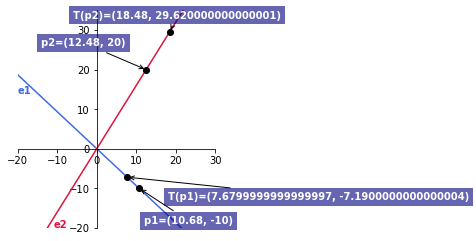

In [36]:
A = np.matrix([[1, 0.3], [0.45, 1.2]])
#matrix = np.matrix([[2, 0],[0, 3]])
#transformed_matrix = A * matrix

#plot_points(matrix)
#plot_points(transformed_matrix.A, '-', lw=3.0)
evals, evecs = np.linalg.eig(A)

x_v1, y_v1 = evecs[:,0].getA1()
x_v2, y_v2 = evecs[:,1].getA1()
m1 = y_v1/x_v1  # Gradient of 1st eigenvector
m2 = y_v2/x_v2  # Gradient of 2nd eigenvector

p1 = [-10/m1, -10]  # 1st point at y = -10
p2 = [20/m2, 20]    # 2nd point at y = -20
trans_p1 = A*np.matrix(p1).T
trans_p2 = A*np.matrix(p2).T

# Plot eigenvectors and labels
plt.plot([x_v1*-50, x_v1*50], [y_v1*-50, y_v1*50], color='royalblue')
plt.plot([x_v2*-50, x_v2*50], [y_v2*-50, y_v2*50], color='crimson')
plt.annotate('e1', xy=(-20, 14),textcoords='data', weight='semibold', color='royalblue')
plt.annotate('e2', xy=(-11, -20),textcoords='data', weight='semibold', color='crimson')

# Plot the points where the eigenvector line and original points intersect
plt.plot(p1[0], p1[1], 'ko')
plt.plot(p2[0], p2[1], 'ko')

# Plot the transformed points that lie on the eigenvector line
plt.plot(trans_p1[0,0], trans_p1[1,0], 'ko')
plt.plot(trans_p2[0,0], trans_p2[1,0], 'ko')

# Plot the point labels
plot_point_label('p1', p1, (12, -19))
plot_point_label('T(p1)', trans_p1.A1, (18, -13))
plot_point_label('p2', p2, (-14, 26))
plot_point_label('T(p2)', trans_p2.A1, (-6, 33))

# Set the axes
ax = plt.axes() 
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_aspect('equal')

# Limit the plot
plt.xlim([-20, 30])
plt.ylim([-20, 35])
plt.show()

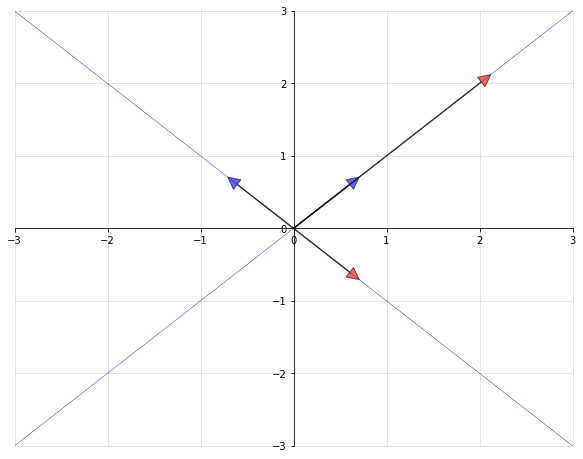

In [37]:
#Eigen Vectors
from scipy.linalg import eig

A = ((1, 2),
     (2, 1))
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    v = np.dot(A , v)
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()